<a href="https://colab.research.google.com/github/kkt86/KerasDL/blob/master/advanced_keras_01_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
for label, count_ in zip(unique, counts):
  print(f"Label: {label}, counts: {count_}")

Label: 0, counts: 5923
Label: 1, counts: 6742
Label: 2, counts: 5958
Label: 3, counts: 6131
Label: 4, counts: 5842
Label: 5, counts: 5421
Label: 6, counts: 5918
Label: 7, counts: 6265
Label: 8, counts: 5851
Label: 9, counts: 5949


In [0]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
for label, count_ in zip(unique, counts):
  print(f"Label: {label}, counts: {count_}")

Label: 0, counts: 980
Label: 1, counts: 1135
Label: 2, counts: 1032
Label: 3, counts: 1010
Label: 4, counts: 982
Label: 5, counts: 892
Label: 6, counts: 958
Label: 7, counts: 1028
Label: 8, counts: 974
Label: 9, counts: 1009


In [0]:
# sample 25 images from train
indexes = np.random.randint(0, len(x_train), 25)
images = x_train[indexes]
labels = y_train[indexes]

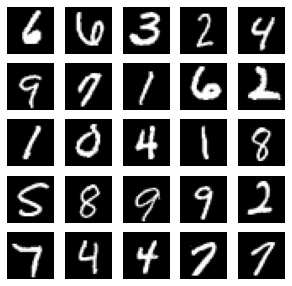

In [0]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

# MLP

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [0]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimension
image_size = x_train.shape[1]
input_size = x_train.shape[1]*x_train.shape[2]

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype("float32")/255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype("float32")/255

In [0]:
# network parameters
batch_size = 128
hidden_unites = 256
dropout = 0.45

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

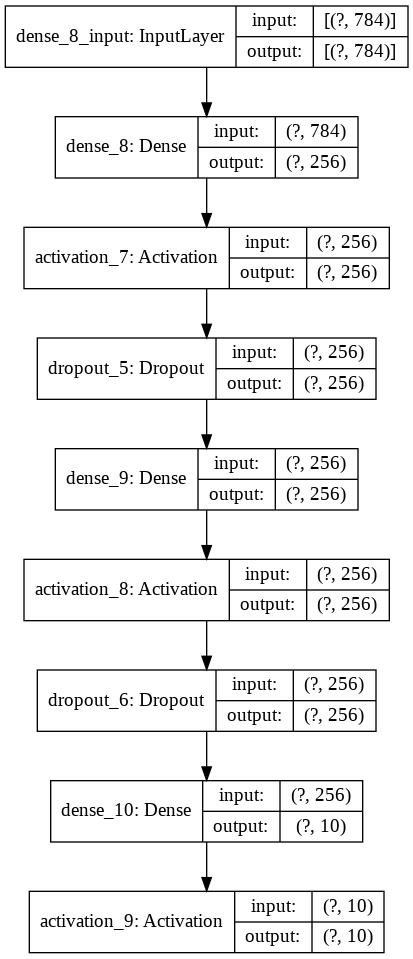

In [0]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_unites, input_dim=input_size))
model.add(Activation("relu"))
model.add(Dropout(dropout))
model.add(Dense(hidden_unites))
model.add(Activation("relu"))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation("softmax"))
model.summary()
plot_model(model, show_shapes=True)

In [0]:
# loss function for one-hot encoder
# use adam optimizer
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4288 - accuracy: 0.8688
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1956 - accuracy: 0.9418
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1540 - accuracy: 0.9536
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1312 - accuracy: 0.9599
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1146 - accuracy: 0.9651
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1023 - accuracy: 0.9679
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0953 - accuracy: 0.9708
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0886 - accuracy: 0.9725
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0839 - accuracy: 0.9737
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0770 - accuracy: 0.9754

In [0]:
# evaluate model 
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.3%
